In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("/content/Walmart.csv")

In [47]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


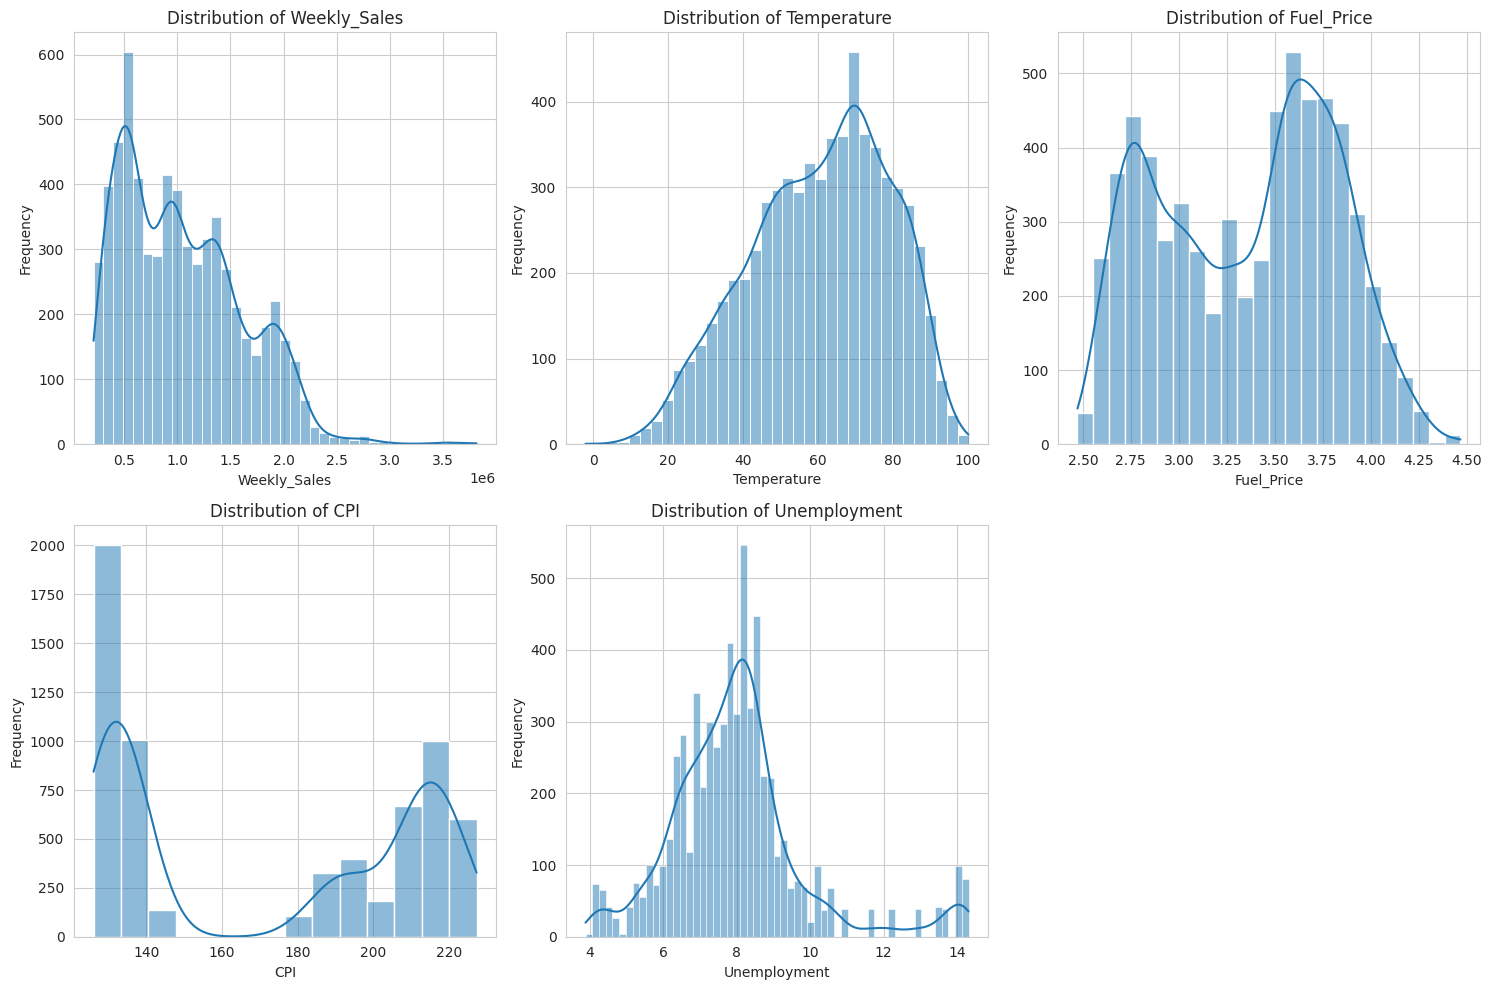

In [49]:
sns.set_style('whitegrid')
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

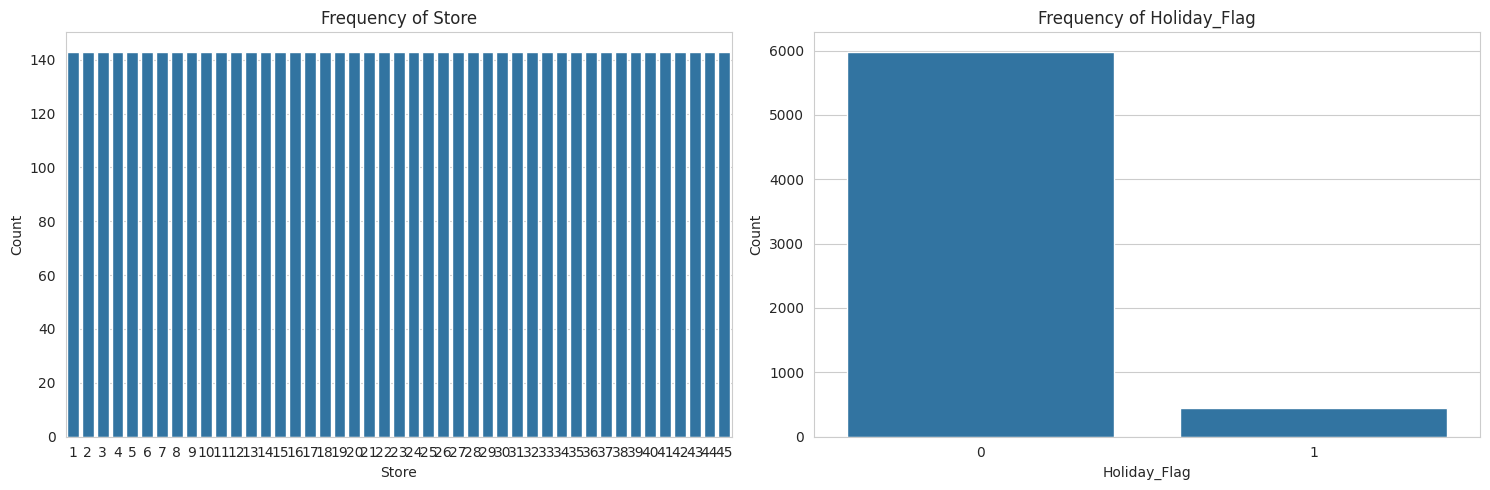

In [50]:
categorical_features = ['Store', 'Holiday_Flag']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

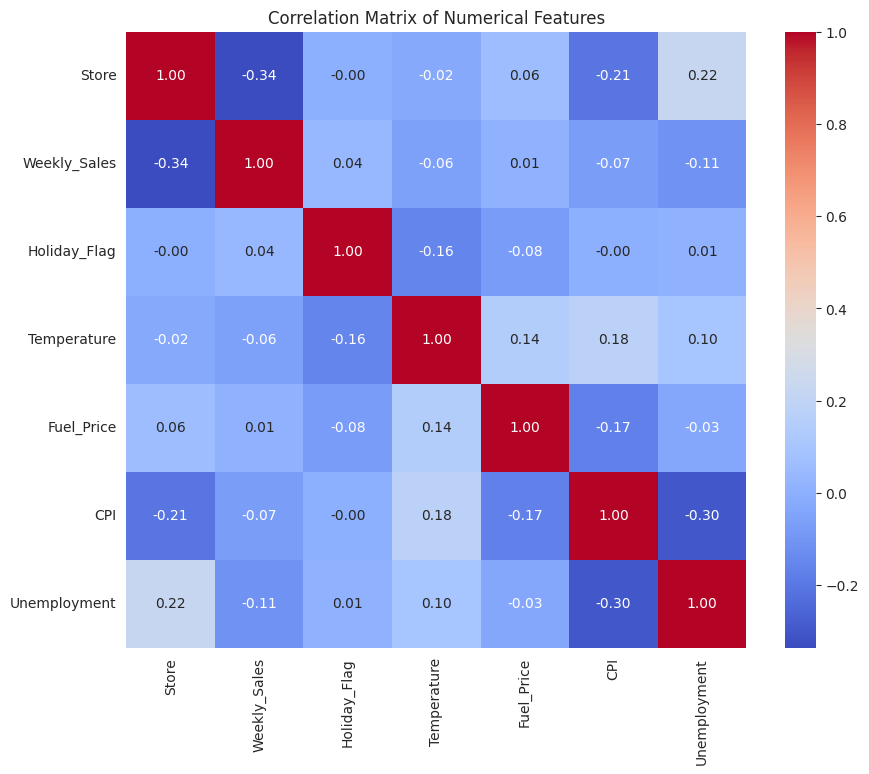

In [51]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

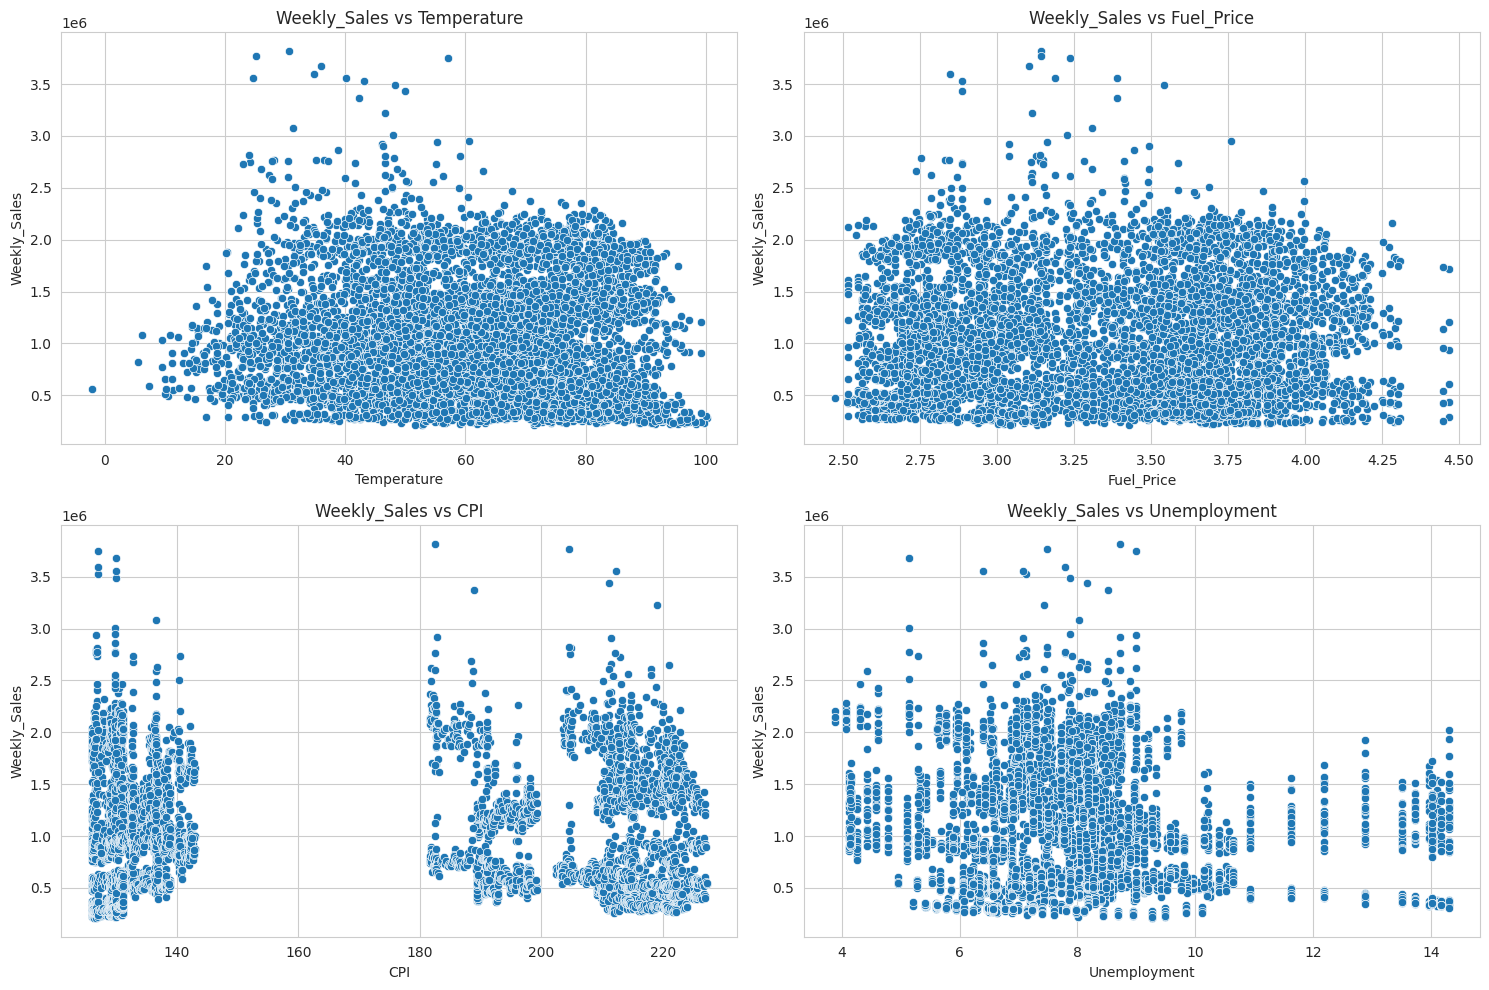

In [52]:
relevant_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(relevant_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['Weekly_Sales'])
    plt.title(f'Weekly_Sales vs {col}')
    plt.xlabel(col)
    plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

In [53]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
if 'Store' in categorical_columns:
    df = pd.get_dummies(df, columns=['Store'], drop_first=True)

display(df.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [54]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

display(df.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [55]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
if 'Store' in categorical_columns:
    df = pd.get_dummies(df, columns=['Store'], drop_first=True)

display(df.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [56]:
df['Store'] = df['Store'].astype(object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
if 'Store' in categorical_columns:
    df = pd.get_dummies(df, columns=['Store'], drop_first=True)

display(df.head())

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df['Weekly_Sales_log'] = np.log1p(df['Weekly_Sales'])
display(df.head())

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Weekly_Sales_log
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,14.312455
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,14.311400
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,14.292967
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,14.158908
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,14.256862


In [59]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Weekly_Sales','Weekly_Sales_log', 'Date'])
y = df['Weekly_Sales_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5148, 49)
Shape of X_test: (1287, 49)
Shape of y_train: (5148,)
Shape of y_test: (1287,)


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.014102482696421951
Root Mean Squared Error (RMSE): 0.11875387444804464
R-squared (R2): 0.9605116798401374
